In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/jesus/Desktop/curso IA/earthquake+data.csv")
df

Date & Time  Latitude  Longitude  Depth  Magnitude  \
0      11/21/2023 16:36  38243.00   38808.00      7        1.0   
1      11/21/2023 15:59  39134.00   29026.00     10        1.0   
2      11/21/2023 13:00  39636.00   30104.00      7        1.0   
3      11/20/2023 18:43  47368.00    6918.00      5        1.0   
4      11/19/2023 10:48  37175.00   36892.00      7        1.0   
...                 ...       ...        ...    ...        ...   
52762   8/28/2023 19:55  -6831.00  116566.00    514        7.1   
52763    5/20/2023 1:51    -22.94     170.56     30        7.1   
52764    7/16/2023 6:48  54527.00 -160842.00     30        7.2   
52765   6/15/2023 18:06    -23.02    -177.16    160        7.2   
52766    5/19/2023 2:57    -23.13     170.86     20        7.7   

                        Lands      Country  
0                     EASTERN       TURKEY  
1                     WESTERN       TURKEY  
2                     WESTERN       TURKEY  
3                 SWITZERLAND  SWITZERLAND  
4                     CENTRAL       TURKEY  
...                       ...          ...  
52762                    BALI          SEA  
52763  SOUTHEAST, OF, LOYALTY      ISLANDS  
52764                  ALASKA    PENINSULA  
52765         SOUTH, OF, FIJI      ISLANDS  
52766  SOUTHEAST, OF, LOYALTY      ISLANDS  

[52767 rows x 7 columns]

In [4]:
df['Date & Time'] = pd.to_datetime( df['Date & Time'] )

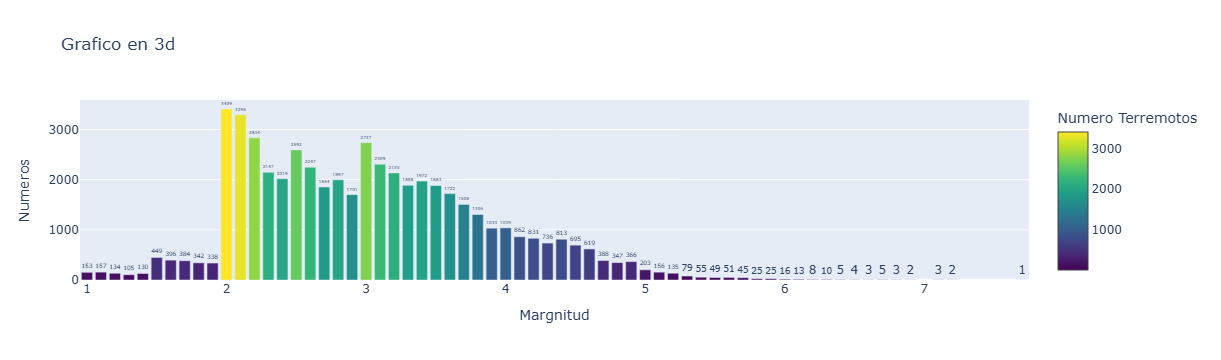

In [5]:
magnitudes = df['Magnitude'].value_counts().sort_index()
fig2 = go.Figure( go.Bar( x=magnitudes.index, y=magnitudes.values, name='barras', marker=dict(color=magnitudes.values, colorscale='Viridis', showscale=True, 
                        colorbar=dict( title='Numero Terremotos' )), text=magnitudes.values, textposition='outside'  ) )
fig2.update_layout( title='Grafico en 3d', xaxis_title='Margnitud', yaxis_title='Numeros')

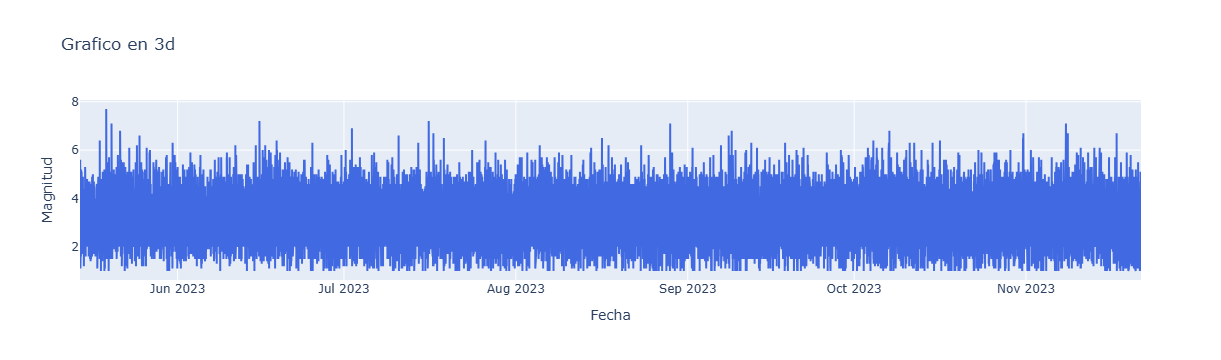

In [6]:
df.sort_values( 'Date & Time', inplace=True )
fig3 = go.Figure( go.Scatter( x=df['Date & Time'], y=df['Magnitude'], mode='lines', line=dict(color='royalblue', width=2), text=df['Magnitude'], textposition='top center'  ) )
fig3.update_layout( title='Grafico en 3d', xaxis_title='Fecha', yaxis_title='Magnitud')

In [8]:
fig4 = go.Figure(go.Scatter(x=df['Depth'],
                            y=df['Magnitude'],
                            mode='markers',
                            marker=dict(size=10,
                                        color=df['Magnitude'],
                                        colorscale='Viridis',
                                        showscale=True,
                                        colorbar=dict(title="Magnitud")),
                            text=df['Magnitude'],
                            hoverinfo='text+x+y'))
fig4.update_layout(
    title="Relación entre Magnitud y Profundidad de Terremotos",
    xaxis_title="Profundidad",
    yaxis_title="Magnitud")

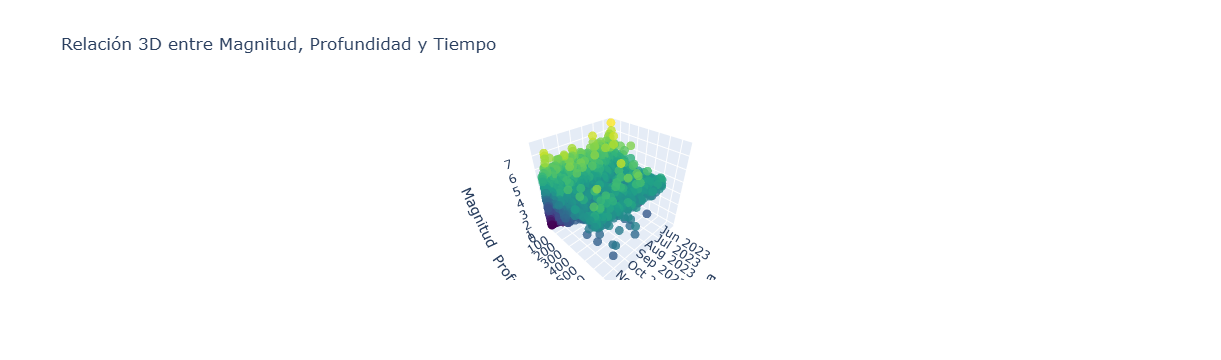

In [7]:
# Gráfico 3d
fig5 = go.Figure(go.Scatter3d(x=df['Date & Time'],
                              y=df['Depth'],
                              z=df['Magnitude'],
                              mode='markers',
                              marker=dict(size=5,
                                          color=df['Magnitude'],
                                          colorscale='Viridis',
                                          opacity=0.8)))
fig5.update_layout(title="Relación 3D entre Magnitud, Profundidad y Tiempo",
                   scene=dict(xaxis_title='Fecha',
                              yaxis_title='Profundidad',
                              zaxis_title='Magnitud'))

In [ ]:
fig1 = px.choropleth( df, locations='Country', locationmode='country names', color='Magnitude', hover_name='Country', projection='natural earth')
fig1.update_layout( title='Mapa' )

In [ ]:
# Inicializar la aplicación Dash
app = dash.Dash(__name__)

In [ ]:
# Creación del Layout general de la app
app.layout = html.Div([
    html.H1("Dashboard de Terremotos"),
    dcc.Graph(id='mapa-coropleto',
             figure=fig1),
    dcc.Graph(id='grafico-barras',
             figure=fig2),
    dcc.Graph(id='grafico-lineas',
             figure=fig3),
    dcc.Graph(id='grafico-dispersion',
             figure=fig4),
    dcc.Graph(id='grafico-3d',
             figure=fig5)])

In [ ]:
# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)